In [10]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [255]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [276]:
NUM_CLASSES = 32

# Dataset reading

In [277]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [278]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [280]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [281]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_30 (Dropout)                 │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 32)                  │             352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,422 (5.55 KB)

 Trainable params: 1,422 (5.55 KB)

 Non-trainable params: 0 (0.00 B)

In [282]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [283]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [284]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0350 - loss: 3.4678 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0799 - loss: 3.4106 - val_accuracy: 0.1759 - val_loss: 3.3076
Epoch 2/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1514 - loss: 3.3042 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1624 - loss: 3.2381 - val_accuracy: 0.2167 - val_loss: 3.0622
Epoch 3/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1795 - loss: 3.0886 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1791 - loss: 3.0552 - val_accuracy: 0.2131 - val_loss: 2.8788
Epoch 4/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1962 - loss: 2.9233 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1955 - loss: 2.9080 - val_accuracy: 0.2679 - val_loss: 2.6942
Epoch 5/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2131 - loss: 2.7965 
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2093 - loss: 2.7721 - val_accuracy: 0.2842 - val_loss: 2.5200
Epoch 6/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2359 - loss: 2.6715 
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2267 - loss: 2.6487 - val_accuracy: 0.3345 - val_loss: 2.3590
Epoch 7/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2604 - loss: 2.5615 
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2576 - loss: 2.5150 - val_accuracy: 0.3667 - val_loss: 2.1728
Epoch 8/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2807 - loss: 2.4235 
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2814 - loss: 2.3918 - val_accuracy: 0.4306 - val_loss: 2.0212
Epoch 9/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2905 - loss: 2.3413 
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2883 - loss: 2.2990 - val_accuracy: 0.4687 - val_loss: 1.8892
Epoch 10/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3215 - loss: 2.1925 
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3107 - loss: 2.1995 - val_accuracy: 0.4751 - val_loss: 1.7789
Epoch 11/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3230 - loss: 2.1602 
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3178 - loss: 2.1491 - val_accuracy: 0.4918 - val_loss: 1.7003
Epoch 12/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3274 - loss: 2.0702 
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3323 - loss: 2.0772 - val_accuracy: 0.5005 - val_loss: 1.6247
Epoch 13/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3297 - loss: 2.0305 
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3373 - loss: 2.0267 - val_accuracy: 0.5295 - val_loss: 1.5654
Epoch 14/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3357 - loss: 2.0228 
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3498 - loss: 1.9947 - val_accuracy: 0.5752 - val_loss: 1.5121
Epoch 15/1000
28/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3657 - loss: 1.9589 
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3560 - loss: 1.9575 - val_accuracy: 0.5775 - val_loss: 1.4859
Epoch 16/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3565 - loss: 1.9183 
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3528 - loss: 1.9290 - val_accuracy: 0.5888 - val_loss: 1.4489
Epoch 17/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3709 - loss: 1.8765 
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3629 - loss: 1.8985 - val_accuracy: 0.5725 - val_loss: 1.4287
Epoch 18/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3606 - loss: 1.9103 
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3636 - loss: 1.8939 - val_accuracy: 0.5916 - val_loss: 1.3962
Epoch 19/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3966 - loss: 1.8437 
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3818 - loss: 1.8597 - val_accuracy: 0.5997 - val_loss: 1.3676
Epoch 20/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 1.8355 
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3817 - loss: 1.8559 - val_accuracy: 0.5938 - val_loss: 1.3544
Epoch 21/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3810 - loss: 1.8303 
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3877 - loss: 1.8199 - val_accuracy: 0.6233 - val_loss: 1.3193
Epoch 22/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3865 - loss: 1.8152 
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3793 - loss: 1.8268 - val_accuracy: 0.6265 - val_loss: 1.3140
Epoch 23/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3901 - loss: 1.7901 
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3947 - loss: 1.7850 - val_accuracy: 0.5825 - val_loss: 1.2920
Epoch 24/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4094 - loss: 1.7970 
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4022 - loss: 1.7884 - val_accuracy: 0.6024 - val_loss: 1.2825
Epoch 25/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4088 - loss: 1.7589 
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4021 - loss: 1.7694 - val_accuracy: 0.6247 - val_loss: 1.2642
Epoch 26/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3951 - loss: 1.7886 
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4024 - loss: 1.7595 - val_accuracy: 0.6210 - val_loss: 1.2425
Epoch 27/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4053 - loss: 1.7559 
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4075 - loss: 1.7602 - val_accuracy: 0.6156 - val_loss: 1.2458
Epoch 28/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3966 - loss: 1.7912 
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4173 - loss: 1.7361 - val_accuracy: 0.6419 - val_loss: 1.2267
Epoch 29/1000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4066 - loss: 1.7174 
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4115 - loss: 1.7259 - val_accuracy: 0.6351 - val_loss: 1.2288
Epoch 30/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4175 - loss: 1.7038 
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4130 - loss: 1.7238 - val_accuracy: 0.6287 - val_loss: 1.2157
Epoch 31/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.6666 
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4243 - loss: 1.6887 - val_accuracy: 0.6786 - val_loss: 1.1980
Epoch 32/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4297 - loss: 1.6686 
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4237 - loss: 1.6906 - val_accuracy: 0.6618 - val_loss: 1.1923
Epoch 33/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4275 - loss: 1.6675 
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4367 - loss: 1.6719 - val_accuracy: 0.6296 - val_loss: 1.1818
Epoch 34/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4335 - loss: 1.6923 
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4361 - loss: 1.6599 - val_accuracy: 0.6677 - val_loss: 1.1627
Epoch 35/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4292 - loss: 1.6647 
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4306 - loss: 1.6747 - val_accuracy: 0.6636 - val_loss: 1.1625
Epoch 36/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4427 - loss: 1.6230 
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4405 - loss: 1.6393 - val_accuracy: 0.6668 - val_loss: 1.1484
Epoch 37/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4442 - loss: 1.6384 
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4391 - loss: 1.6603 - val_accuracy: 0.6627 - val_loss: 1.1548
Epoch 38/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4259 - loss: 1.6676 
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4365 - loss: 1.6461 - val_accuracy: 0.6650 - val_loss: 1.1269
Epoch 39/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4519 - loss: 1.6629 
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4480 - loss: 1.6342 - val_accuracy: 0.6605 - val_loss: 1.1271
Epoch 40/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4404 - loss: 1.6682 
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4491 - loss: 1.6373 - val_accuracy: 0.6505 - val_loss: 1.1215
Epoch 41/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4439 - loss: 1.6403 
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4518 - loss: 1.6189 - val_accuracy: 0.6695 - val_loss: 1.1091
Epoch 42/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4543 - loss: 1.6066 
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4526 - loss: 1.6121 - val_accuracy: 0.6582 - val_loss: 1.1057
Epoch 43/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4658 - loss: 1.5801 
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4551 - loss: 1.6093 - val_accuracy: 0.6791 - val_loss: 1.1088
Epoch 44/1000
36/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4451 - loss: 1.6297 
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4569 - loss: 1.6071 - val_accuracy: 0.6650 - val_loss: 1.0994
Epoch 45/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4617 - loss: 1.6156 
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4648 - loss: 1.5905 - val_accuracy: 0.6949 - val_loss: 1.0809
Epoch 46/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 1.6232 
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4547 - loss: 1.6058 - val_accuracy: 0.6736 - val_loss: 1.0872
Epoch 47/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4748 - loss: 1.5781 
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4584 - loss: 1.5947 - val_accuracy: 0.6976 - val_loss: 1.0757
Epoch 48/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4568 - loss: 1.5978 
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4615 - loss: 1.5694 - val_accuracy: 0.6936 - val_loss: 1.0760
Epoch 49/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 1.5373 
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4665 - loss: 1.5689 - val_accuracy: 0.6913 - val_loss: 1.0732
Epoch 50/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 1.6049 
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4603 - loss: 1.5739 - val_accuracy: 0.6904 - val_loss: 1.0666
Epoch 51/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4619 - loss: 1.5872 
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4707 - loss: 1.5495 - val_accuracy: 0.6863 - val_loss: 1.0663
Epoch 52/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.5716 
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4707 - loss: 1.5560 - val_accuracy: 0.6895 - val_loss: 1.0456
Epoch 53/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 1.5560 
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4779 - loss: 1.5590 - val_accuracy: 0.7031 - val_loss: 1.0411
Epoch 54/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4676 - loss: 1.5710 
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4730 - loss: 1.5498 - val_accuracy: 0.6917 - val_loss: 1.0432
Epoch 55/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4831 - loss: 1.5269 
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4731 - loss: 1.5449 - val_accuracy: 0.6786 - val_loss: 1.0425
Epoch 56/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - loss: 1.5579 
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4646 - loss: 1.5495 - val_accuracy: 0.6868 - val_loss: 1.0409
Epoch 57/1000
49/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4719 - loss: 1.5374 
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4662 - loss: 1.5483 - val_accuracy: 0.6845 - val_loss: 1.0337
Epoch 58/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 1.5613 
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4717 - loss: 1.5414 - val_accuracy: 0.6777 - val_loss: 1.0319
Epoch 59/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4748 - loss: 1.5553 
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4798 - loss: 1.5313 - val_accuracy: 0.7053 - val_loss: 1.0205
Epoch 60/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4782 - loss: 1.5624 
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4819 - loss: 1.5479 - val_accuracy: 0.7067 - val_loss: 1.0204
Epoch 61/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4960 - loss: 1.4931 
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4819 - loss: 1.5306 - val_accuracy: 0.6872 - val_loss: 1.0181
Epoch 62/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4769 - loss: 1.5016 
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4769 - loss: 1.5153 - val_accuracy: 0.7121 - val_loss: 1.0036
Epoch 63/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4658 - loss: 1.5425 
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4743 - loss: 1.5257 - val_accuracy: 0.6985 - val_loss: 1.0103
Epoch 64/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 1.5183 
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4822 - loss: 1.5208 - val_accuracy: 0.7112 - val_loss: 1.0118
Epoch 65/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4638 - loss: 1.5258 
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4891 - loss: 1.5047 - val_accuracy: 0.6940 - val_loss: 1.0000
Epoch 66/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4901 - loss: 1.4967 
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4782 - loss: 1.5087 - val_accuracy: 0.7040 - val_loss: 1.0067
Epoch 67/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4770 - loss: 1.5466 
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4864 - loss: 1.5224 - val_accuracy: 0.7112 - val_loss: 1.0054
Epoch 68/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4954 - loss: 1.4766 
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4869 - loss: 1.5102 - val_accuracy: 0.6954 - val_loss: 0.9929
Epoch 69/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 1.4578 
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4834 - loss: 1.4865 - val_accuracy: 0.6999 - val_loss: 0.9875
Epoch 70/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 1.4820 
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4873 - loss: 1.5022 - val_accuracy: 0.7013 - val_loss: 0.9880
Epoch 71/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4948 - loss: 1.4937 
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4891 - loss: 1.4778 - val_accuracy: 0.7117 - val_loss: 0.9842
Epoch 72/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4839 - loss: 1.5087 
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4843 - loss: 1.4976 - val_accuracy: 0.7267 - val_loss: 0.9762
Epoch 73/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4988 - loss: 1.5006 
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4991 - loss: 1.4841 - val_accuracy: 0.7180 - val_loss: 0.9670
Epoch 74/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5285 - loss: 1.4153 
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 1.4610 - val_accuracy: 0.6854 - val_loss: 0.9736
Epoch 75/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5043 - loss: 1.4805 
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4976 - loss: 1.4825 - val_accuracy: 0.7158 - val_loss: 0.9751
Epoch 76/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 1.4666 
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4961 - loss: 1.4707 - val_accuracy: 0.6985 - val_loss: 0.9698
Epoch 77/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4723 - loss: 1.5243 
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4927 - loss: 1.4796 - val_accuracy: 0.6840 - val_loss: 0.9654
Epoch 78/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4956 - loss: 1.4611 
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4934 - loss: 1.4771 - val_accuracy: 0.7189 - val_loss: 0.9634
Epoch 79/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5050 - loss: 1.4599 
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4992 - loss: 1.4677 - val_accuracy: 0.7189 - val_loss: 0.9549
Epoch 80/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 1.4680 
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5033 - loss: 1.4555 - val_accuracy: 0.7380 - val_loss: 0.9522
Epoch 81/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 1.4412 
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4982 - loss: 1.4725 - val_accuracy: 0.7208 - val_loss: 0.9532
Epoch 82/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4938 - loss: 1.4621 
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4956 - loss: 1.4584 - val_accuracy: 0.7185 - val_loss: 0.9454
Epoch 83/1000
35/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4983 - loss: 1.4547 
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4995 - loss: 1.4655 - val_accuracy: 0.7262 - val_loss: 0.9541
Epoch 84/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4868 - loss: 1.4896 
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 1.4785 - val_accuracy: 0.7126 - val_loss: 0.9541
Epoch 85/1000
35/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4870 - loss: 1.4852 
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4959 - loss: 1.4787 - val_accuracy: 0.7348 - val_loss: 0.9550
Epoch 86/1000
35/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5049 - loss: 1.4580 
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4983 - loss: 1.4555 - val_accuracy: 0.7348 - val_loss: 0.9430
Epoch 87/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5049 - loss: 1.4326 
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5008 - loss: 1.4462 - val_accuracy: 0.7230 - val_loss: 0.9301
Epoch 88/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 1.4568  
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5097 - loss: 1.4395 - val_accuracy: 0.7344 - val_loss: 0.9376
Epoch 89/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5017 - loss: 1.4505 
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5145 - loss: 1.4294 - val_accuracy: 0.7035 - val_loss: 0.9268
Epoch 90/1000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 1.4664 
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5089 - loss: 1.4531 - val_accuracy: 0.7312 - val_loss: 0.9263
Epoch 91/1000
47/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5091 - loss: 1.4420 
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4998 - loss: 1.4650 - val_accuracy: 0.7393 - val_loss: 0.9478
Epoch 92/1000
47/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5018 - loss: 1.4531 
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5053 - loss: 1.4372 - val_accuracy: 0.7403 - val_loss: 0.9300
Epoch 93/1000
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5124 - loss: 1.4223 
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5150 - loss: 1.4313 - val_accuracy: 0.7289 - val_loss: 0.9234
Epoch 94/1000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 1.4341 
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5098 - loss: 1.4360 - val_accuracy: 0.7199 - val_loss: 0.9260
Epoch 95/1000
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5033 - loss: 1.4570 
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5023 - loss: 1.4462 - val_accuracy: 0.7353 - val_loss: 0.9270
Epoch 96/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 1.4742 
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5044 - loss: 1.4491 - val_accuracy: 0.7557 - val_loss: 0.9193
Epoch 97/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5055 - loss: 1.4332 
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5014 - loss: 1.4430 - val_accuracy: 0.7421 - val_loss: 0.9227
Epoch 98/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 1.4406 
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 1.4120 - val_accuracy: 0.7353 - val_loss: 0.9125
Epoch 99/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5096 - loss: 1.4242 
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5003 - loss: 1.4436 - val_accuracy: 0.7276 - val_loss: 0.9316
Epoch 100/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 1.4443 
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5121 - loss: 1.4333 - val_accuracy: 0.7294 - val_loss: 0.9088
Epoch 101/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 1.4002 
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 1.4249 - val_accuracy: 0.7375 - val_loss: 0.8981
Epoch 102/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5092 - loss: 1.4453 
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5107 - loss: 1.4466 - val_accuracy: 0.7416 - val_loss: 0.8977
Epoch 103/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 1.4548 
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5112 - loss: 1.4230 - val_accuracy: 0.7516 - val_loss: 0.9108
Epoch 104/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 1.4173 
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 1.4035 - val_accuracy: 0.7407 - val_loss: 0.8923
Epoch 105/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5293 - loss: 1.3932 
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5178 - loss: 1.4090 - val_accuracy: 0.7452 - val_loss: 0.8977
Epoch 106/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5194 - loss: 1.3804 
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5139 - loss: 1.4091 - val_accuracy: 0.7516 - val_loss: 0.9020
Epoch 107/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5122 - loss: 1.4507 
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5148 - loss: 1.4367 - val_accuracy: 0.7303 - val_loss: 0.9056
Epoch 108/1000
36/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5189 - loss: 1.4081 
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 1.4148 - val_accuracy: 0.7298 - val_loss: 0.8944
Epoch 109/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5194 - loss: 1.4095 
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5187 - loss: 1.3999 - val_accuracy: 0.7738 - val_loss: 0.9009
Epoch 110/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 1.4302 
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5187 - loss: 1.4014 - val_accuracy: 0.7584 - val_loss: 0.8867
Epoch 111/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 1.3728 
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5263 - loss: 1.4052 - val_accuracy: 0.7575 - val_loss: 0.8875
Epoch 112/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5265 - loss: 1.3866 
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 1.4148 - val_accuracy: 0.7643 - val_loss: 0.8935
Epoch 113/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5226 - loss: 1.4078 
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 1.4000 - val_accuracy: 0.7629 - val_loss: 0.8912
Epoch 114/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 1.3637 
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5273 - loss: 1.3783 - val_accuracy: 0.7516 - val_loss: 0.8865
Epoch 115/1000
35/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5449 - loss: 1.3749 
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 1.3895 - val_accuracy: 0.7647 - val_loss: 0.8800
Epoch 116/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 1.3418 
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5171 - loss: 1.3965 - val_accuracy: 0.7362 - val_loss: 0.8868
Epoch 117/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 1.4372 
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 1.4020 - val_accuracy: 0.7276 - val_loss: 0.8805
Epoch 118/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 1.3791  
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5242 - loss: 1.3845 - val_accuracy: 0.7702 - val_loss: 0.8810
Epoch 119/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 1.3794 
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5301 - loss: 1.3796 - val_accuracy: 0.7688 - val_loss: 0.8748
Epoch 120/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 1.3972 
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5313 - loss: 1.3820 - val_accuracy: 0.7647 - val_loss: 0.8762
Epoch 121/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5253 - loss: 1.4009 
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 1.3784 - val_accuracy: 0.7607 - val_loss: 0.8744
Epoch 122/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 1.4078 
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5322 - loss: 1.3898 - val_accuracy: 0.7348 - val_loss: 0.8784
Epoch 123/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 1.3861 
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5364 - loss: 1.3724 - val_accuracy: 0.7448 - val_loss: 0.8702
Epoch 124/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 1.3864 
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5376 - loss: 1.3717 - val_accuracy: 0.7715 - val_loss: 0.8765
Epoch 125/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5388 - loss: 1.3746 
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5317 - loss: 1.3787 - val_accuracy: 0.7529 - val_loss: 0.8630
Epoch 126/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5199 - loss: 1.3953 
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5293 - loss: 1.3692 - val_accuracy: 0.7625 - val_loss: 0.8634
Epoch 127/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - loss: 1.3677 
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5331 - loss: 1.3835 - val_accuracy: 0.7733 - val_loss: 0.8569
Epoch 128/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5429 - loss: 1.3464 
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.3637 - val_accuracy: 0.7570 - val_loss: 0.8779
Epoch 129/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5119 - loss: 1.4284 
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 1.3881 - val_accuracy: 0.7448 - val_loss: 0.8659
Epoch 130/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5502 - loss: 1.3647 
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5364 - loss: 1.3727 - val_accuracy: 0.7498 - val_loss: 0.8563
Epoch 131/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5295 - loss: 1.3807 
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 1.3827 - val_accuracy: 0.7661 - val_loss: 0.8654
Epoch 132/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5365 - loss: 1.3787 
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 1.3767 - val_accuracy: 0.7738 - val_loss: 0.8569
Epoch 133/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 1.3359 
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 1.3668 - val_accuracy: 0.7847 - val_loss: 0.8563
Epoch 134/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 1.3973 
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5246 - loss: 1.3989 - val_accuracy: 0.7715 - val_loss: 0.8728
Epoch 135/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 1.3894 
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5311 - loss: 1.3954 - val_accuracy: 0.7684 - val_loss: 0.8739
Epoch 136/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 1.3957 
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5366 - loss: 1.3651 - val_accuracy: 0.7634 - val_loss: 0.8607
Epoch 137/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 1.3877 
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 1.3665 - val_accuracy: 0.7774 - val_loss: 0.8422
Epoch 138/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5314 - loss: 1.3506 
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5263 - loss: 1.3707 - val_accuracy: 0.7765 - val_loss: 0.8562
Epoch 139/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5220 - loss: 1.3837 
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5322 - loss: 1.3645 - val_accuracy: 0.7520 - val_loss: 0.8431
Epoch 140/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - loss: 1.3387 
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 1.3830 - val_accuracy: 0.7792 - val_loss: 0.8696
Epoch 141/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 1.3383 
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5270 - loss: 1.3715 - val_accuracy: 0.7770 - val_loss: 0.8510
Epoch 142/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5375 - loss: 1.3152 
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5329 - loss: 1.3598 - val_accuracy: 0.7733 - val_loss: 0.8475
Epoch 143/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.3649 
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5360 - loss: 1.3653 - val_accuracy: 0.7788 - val_loss: 0.8609
Epoch 144/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5524 - loss: 1.3165 
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5476 - loss: 1.3417 - val_accuracy: 0.7684 - val_loss: 0.8607
Epoch 145/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 1.3650 
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5420 - loss: 1.3349 - val_accuracy: 0.7484 - val_loss: 0.8409
Epoch 146/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - loss: 1.3442 
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 1.3595 - val_accuracy: 0.7729 - val_loss: 0.8352
Epoch 147/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 1.3705 
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5376 - loss: 1.3471 - val_accuracy: 0.7788 - val_loss: 0.8314
Epoch 148/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5114 - loss: 1.3982 
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5272 - loss: 1.3695 - val_accuracy: 0.7874 - val_loss: 0.8350
Epoch 149/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 1.3094 
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5348 - loss: 1.3633 - val_accuracy: 0.8005 - val_loss: 0.8513
Epoch 150/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 1.3521 
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 1.3505 - val_accuracy: 0.7747 - val_loss: 0.8402
Epoch 151/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 1.2966 
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: 1.3279 - val_accuracy: 0.7625 - val_loss: 0.8335
Epoch 152/1000
43/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5246 - loss: 1.3717 
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5313 - loss: 1.3666 - val_accuracy: 0.7557 - val_loss: 0.8425
Epoch 153/1000
49/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 1.3442 
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5461 - loss: 1.3482 - val_accuracy: 0.7634 - val_loss: 0.8410
Epoch 154/1000
26/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 1.3275 
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5509 - loss: 1.3237 - val_accuracy: 0.8001 - val_loss: 0.8330
Epoch 155/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - loss: 1.3093 
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5465 - loss: 1.3326 - val_accuracy: 0.7715 - val_loss: 0.8435
Epoch 156/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5330 - loss: 1.3578 
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5361 - loss: 1.3617 - val_accuracy: 0.7833 - val_loss: 0.8459
Epoch 157/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 1.3265 
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5432 - loss: 1.3406 - val_accuracy: 0.8028 - val_loss: 0.8351
Epoch 158/1000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 1.3177 
Epoch 158: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5462 - loss: 1.3220 - val_accuracy: 0.7951 - val_loss: 0.8291
Epoch 159/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5368 - loss: 1.3546 
Epoch 159: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5375 - loss: 1.3549 - val_accuracy: 0.8028 - val_loss: 0.8400
Epoch 160/1000
28/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.3524 
Epoch 160: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5396 - loss: 1.3522 - val_accuracy: 0.7974 - val_loss: 0.8375
Epoch 161/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5339 - loss: 1.3138 
Epoch 161: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5441 - loss: 1.3430 - val_accuracy: 0.7820 - val_loss: 0.8344
Epoch 162/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - loss: 1.3341 
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5481 - loss: 1.3262 - val_accuracy: 0.8033 - val_loss: 0.8118
Epoch 163/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5335 - loss: 1.3680 
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5376 - loss: 1.3623 - val_accuracy: 0.7684 - val_loss: 0.8394
Epoch 164/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 1.3888 
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 1.3509 - val_accuracy: 0.8001 - val_loss: 0.8266
Epoch 165/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5374 - loss: 1.3501 
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5354 - loss: 1.3437 - val_accuracy: 0.7869 - val_loss: 0.8366
Epoch 166/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 1.3495 
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5419 - loss: 1.3393 - val_accuracy: 0.8028 - val_loss: 0.8287
Epoch 167/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5374 - loss: 1.3782 
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5440 - loss: 1.3482 - val_accuracy: 0.7806 - val_loss: 0.8251
Epoch 168/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5585 - loss: 1.3034 
Epoch 168: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 1.3403 - val_accuracy: 0.7865 - val_loss: 0.8208
Epoch 169/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5317 - loss: 1.4036 
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5399 - loss: 1.3566 - val_accuracy: 0.7697 - val_loss: 0.8250
Epoch 170/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 1.3262 
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5487 - loss: 1.3322 - val_accuracy: 0.7951 - val_loss: 0.8076
Epoch 171/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5498 - loss: 1.3360  
Epoch 171: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5500 - loss: 1.3292 - val_accuracy: 0.8087 - val_loss: 0.8067
Epoch 172/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.3220 
Epoch 172: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5491 - loss: 1.3281 - val_accuracy: 0.8064 - val_loss: 0.8290
Epoch 173/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 1.2999 
Epoch 173: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5477 - loss: 1.3325 - val_accuracy: 0.8160 - val_loss: 0.8248
Epoch 174/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 1.3277 
Epoch 174: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5446 - loss: 1.3193 - val_accuracy: 0.8024 - val_loss: 0.8228
Epoch 175/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5543 - loss: 1.3197 
Epoch 175: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5606 - loss: 1.3164 - val_accuracy: 0.8191 - val_loss: 0.8065
Epoch 176/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.3377 
Epoch 176: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5585 - loss: 1.3293 - val_accuracy: 0.8037 - val_loss: 0.8168
Epoch 177/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5348 - loss: 1.3501 
Epoch 177: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5485 - loss: 1.3220 - val_accuracy: 0.7933 - val_loss: 0.8072
Epoch 178/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 1.3006 
Epoch 178: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5521 - loss: 1.3166 - val_accuracy: 0.7847 - val_loss: 0.8111
Epoch 179/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 1.3386 
Epoch 179: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5499 - loss: 1.3257 - val_accuracy: 0.7974 - val_loss: 0.8076
Epoch 180/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5650 - loss: 1.3055 
Epoch 180: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5491 - loss: 1.3301 - val_accuracy: 0.7910 - val_loss: 0.8193
Epoch 181/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5377 - loss: 1.3437 
Epoch 181: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5420 - loss: 1.3546 - val_accuracy: 0.8055 - val_loss: 0.8190
Epoch 182/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 1.3365 
Epoch 182: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5530 - loss: 1.3196 - val_accuracy: 0.7792 - val_loss: 0.8038
Epoch 183/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 1.3564 
Epoch 183: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5465 - loss: 1.3311 - val_accuracy: 0.8033 - val_loss: 0.8123
Epoch 184/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 1.2958 
Epoch 184: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5601 - loss: 1.3078 - val_accuracy: 0.8019 - val_loss: 0.8074
Epoch 185/1000
28/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5473 - loss: 1.3106 
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5484 - loss: 1.3116 - val_accuracy: 0.8132 - val_loss: 0.7969
Epoch 186/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 1.3088 
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 1.3250 - val_accuracy: 0.8119 - val_loss: 0.8048
Epoch 187/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 1.3196 
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5553 - loss: 1.3194 - val_accuracy: 0.8105 - val_loss: 0.8183
Epoch 188/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 1.3470 
Epoch 188: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5461 - loss: 1.3355 - val_accuracy: 0.8069 - val_loss: 0.8173
Epoch 189/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5505 - loss: 1.3178 
Epoch 189: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 1.3254 - val_accuracy: 0.8146 - val_loss: 0.8105
Epoch 190/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 1.3181 
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5520 - loss: 1.3317 - val_accuracy: 0.8042 - val_loss: 0.8171
Epoch 191/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 1.3018 
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5479 - loss: 1.3298 - val_accuracy: 0.7924 - val_loss: 0.8077
Epoch 192/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 1.3385 
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5450 - loss: 1.3423 - val_accuracy: 0.8160 - val_loss: 0.7908
Epoch 193/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 1.2973 
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5639 - loss: 1.3058 - val_accuracy: 0.8187 - val_loss: 0.8110
Epoch 194/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 1.3414 
Epoch 194: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5447 - loss: 1.3286 - val_accuracy: 0.7928 - val_loss: 0.8088
Epoch 195/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5766 - loss: 1.2538 
Epoch 195: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5589 - loss: 1.3120 - val_accuracy: 0.8209 - val_loss: 0.8131
Epoch 196/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 1.3118 
Epoch 196: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5527 - loss: 1.3083 - val_accuracy: 0.8060 - val_loss: 0.7966
Epoch 197/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5526 - loss: 1.3254 
Epoch 197: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 1.3062 - val_accuracy: 0.8309 - val_loss: 0.8018
Epoch 198/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 1.3231 
Epoch 198: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5612 - loss: 1.3064 - val_accuracy: 0.8187 - val_loss: 0.8021
Epoch 199/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5572 - loss: 1.3144 
Epoch 199: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5490 - loss: 1.3255 - val_accuracy: 0.8160 - val_loss: 0.8117
Epoch 200/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 1.3082 
Epoch 200: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5511 - loss: 1.3294 - val_accuracy: 0.8132 - val_loss: 0.8005
Epoch 201/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 1.3407 
Epoch 201: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 1.3259 - val_accuracy: 0.8164 - val_loss: 0.7986
Epoch 202/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 1.3095 
Epoch 202: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5606 - loss: 1.3101 - val_accuracy: 0.8087 - val_loss: 0.7872
Epoch 203/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5557 - loss: 1.3142 
Epoch 203: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5484 - loss: 1.3245 - val_accuracy: 0.8169 - val_loss: 0.7966
Epoch 204/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5592 - loss: 1.2780 
Epoch 204: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 1.3049 - val_accuracy: 0.7987 - val_loss: 0.7921
Epoch 205/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 1.2908 
Epoch 205: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5583 - loss: 1.3091 - val_accuracy: 0.8200 - val_loss: 0.7882
Epoch 206/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 1.3393 
Epoch 206: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 1.3368 - val_accuracy: 0.8228 - val_loss: 0.7827
Epoch 207/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5574 - loss: 1.3508 
Epoch 207: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5612 - loss: 1.3072 - val_accuracy: 0.8209 - val_loss: 0.7835
Epoch 208/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5554 - loss: 1.3269 
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5545 - loss: 1.3170 - val_accuracy: 0.8028 - val_loss: 0.7889
Epoch 209/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5494 - loss: 1.3161 
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 1.3072 - val_accuracy: 0.8010 - val_loss: 0.7929
Epoch 210/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - loss: 1.2895 
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5576 - loss: 1.3102 - val_accuracy: 0.7924 - val_loss: 0.7970
Epoch 211/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 1.2970 
Epoch 211: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5552 - loss: 1.3090 - val_accuracy: 0.7969 - val_loss: 0.8046
Epoch 212/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5540 - loss: 1.3081 
Epoch 212: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5561 - loss: 1.3053 - val_accuracy: 0.8019 - val_loss: 0.7901
Epoch 213/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 1.2985 
Epoch 213: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5496 - loss: 1.3052 - val_accuracy: 0.7960 - val_loss: 0.8001
Epoch 214/1000
36/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5783 - loss: 1.2842   
Epoch 214: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5653 - loss: 1.2987 - val_accuracy: 0.8191 - val_loss: 0.7776
Epoch 215/1000
49/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 1.2853 
Epoch 215: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5553 - loss: 1.3184 - val_accuracy: 0.8241 - val_loss: 0.7934
Epoch 216/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 1.3197 
Epoch 216: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 1.3068 - val_accuracy: 0.8214 - val_loss: 0.7884
Epoch 217/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 1.2804 
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5538 - loss: 1.3043 - val_accuracy: 0.8223 - val_loss: 0.7689
Epoch 218/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 1.3032 
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5607 - loss: 1.3012 - val_accuracy: 0.8296 - val_loss: 0.7849
Epoch 219/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.3169 
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5470 - loss: 1.3200 - val_accuracy: 0.8345 - val_loss: 0.7898
Epoch 220/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 1.2832 
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 1.2951 - val_accuracy: 0.8354 - val_loss: 0.7871
Epoch 221/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5612 - loss: 1.3344 
Epoch 221: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5570 - loss: 1.3289 - val_accuracy: 0.8318 - val_loss: 0.7921
Epoch 222/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 1.2819 
Epoch 222: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5624 - loss: 1.3090 - val_accuracy: 0.8300 - val_loss: 0.7833
Epoch 223/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5357 - loss: 1.3438 
Epoch 223: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5526 - loss: 1.2910 - val_accuracy: 0.8209 - val_loss: 0.7796
Epoch 224/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5611 - loss: 1.2958 
Epoch 224: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5695 - loss: 1.2888 - val_accuracy: 0.8232 - val_loss: 0.7835
Epoch 225/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 1.3052 
Epoch 225: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5533 - loss: 1.3002 - val_accuracy: 0.7910 - val_loss: 0.7954
Epoch 226/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5567 - loss: 1.3081 
Epoch 226: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5565 - loss: 1.3247 - val_accuracy: 0.8237 - val_loss: 0.7842
Epoch 227/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 1.2935 
Epoch 227: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5536 - loss: 1.3113 - val_accuracy: 0.8409 - val_loss: 0.7707
Epoch 228/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5617 - loss: 1.2577 
Epoch 228: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5618 - loss: 1.2918 - val_accuracy: 0.8377 - val_loss: 0.7723
Epoch 229/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5515 - loss: 1.3113 
Epoch 229: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5559 - loss: 1.2979 - val_accuracy: 0.8268 - val_loss: 0.7875
Epoch 230/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5528 - loss: 1.2927 
Epoch 230: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 1.2874 - val_accuracy: 0.8005 - val_loss: 0.7700
Epoch 231/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5578 - loss: 1.2942 
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5506 - loss: 1.3113 - val_accuracy: 0.8341 - val_loss: 0.7872
Epoch 232/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5334 - loss: 1.3377 
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5521 - loss: 1.3091 - val_accuracy: 0.8309 - val_loss: 0.7766
Epoch 233/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 1.2963 
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5613 - loss: 1.2955 - val_accuracy: 0.8282 - val_loss: 0.7785
Epoch 234/1000
33/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5732 - loss: 1.2779 
Epoch 234: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5583 - loss: 1.2907 - val_accuracy: 0.8382 - val_loss: 0.7794
Epoch 235/1000
35/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5581 - loss: 1.3202 
Epoch 235: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 1.3103 - val_accuracy: 0.8323 - val_loss: 0.7717
Epoch 236/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 1.3444 
Epoch 236: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5500 - loss: 1.3266 - val_accuracy: 0.8400 - val_loss: 0.7750
Epoch 237/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5411 - loss: 1.3218 
Epoch 237: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 1.2878 - val_accuracy: 0.8296 - val_loss: 0.7617
Epoch 238/1000
25/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 1.2213 
Epoch 238: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5561 - loss: 1.2841 - val_accuracy: 0.8391 - val_loss: 0.7803
Epoch 239/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 1.3732 
Epoch 239: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5509 - loss: 1.3207 - val_accuracy: 0.8286 - val_loss: 0.7623
Epoch 240/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 1.2709 
Epoch 240: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5615 - loss: 1.2845 - val_accuracy: 0.8228 - val_loss: 0.7660
Epoch 241/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 1.2986 
Epoch 241: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5580 - loss: 1.2954 - val_accuracy: 0.8377 - val_loss: 0.7637
Epoch 242/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 1.2956 
Epoch 242: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5568 - loss: 1.2869 - val_accuracy: 0.8196 - val_loss: 0.7664
Epoch 243/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5623 - loss: 1.2967 
Epoch 243: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5642 - loss: 1.3048 - val_accuracy: 0.8123 - val_loss: 0.7645
Epoch 244/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 1.3072 
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5589 - loss: 1.3002 - val_accuracy: 0.8404 - val_loss: 0.7817
Epoch 245/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 1.2660 
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5565 - loss: 1.3019 - val_accuracy: 0.8409 - val_loss: 0.7687
Epoch 246/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 1.2771 
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5609 - loss: 1.2942 - val_accuracy: 0.8282 - val_loss: 0.7735
Epoch 247/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 1.2911 
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5645 - loss: 1.2936 - val_accuracy: 0.8250 - val_loss: 0.7671
Epoch 248/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 1.2753 
Epoch 248: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5632 - loss: 1.2947 - val_accuracy: 0.8327 - val_loss: 0.7771
Epoch 249/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 1.3590 
Epoch 249: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5532 - loss: 1.3298 - val_accuracy: 0.8055 - val_loss: 0.7717
Epoch 250/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5552 - loss: 1.2931 
Epoch 250: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5585 - loss: 1.2982 - val_accuracy: 0.8336 - val_loss: 0.7646
Epoch 251/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 1.3134 
Epoch 251: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5623 - loss: 1.2925 - val_accuracy: 0.8404 - val_loss: 0.7737
Epoch 252/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5532 - loss: 1.3077 
Epoch 252: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5571 - loss: 1.2857 - val_accuracy: 0.8540 - val_loss: 0.7662
Epoch 253/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 1.3329 
Epoch 253: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5638 - loss: 1.2943 - val_accuracy: 0.8286 - val_loss: 0.7647
Epoch 254/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 1.3009 
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5647 - loss: 1.2912 - val_accuracy: 0.8114 - val_loss: 0.7714
Epoch 255/1000
29/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5655 - loss: 1.2790 
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5762 - loss: 1.2594 - val_accuracy: 0.8246 - val_loss: 0.7419
Epoch 256/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5759 - loss: 1.2873 
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5678 - loss: 1.2997 - val_accuracy: 0.8037 - val_loss: 0.7606
Epoch 257/1000
28/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5463 - loss: 1.3266 
Epoch 257: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5606 - loss: 1.3070 - val_accuracy: 0.8490 - val_loss: 0.7714
Epoch 258/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5854 - loss: 1.3079 
Epoch 258: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5724 - loss: 1.2767 - val_accuracy: 0.8314 - val_loss: 0.7602
Epoch 259/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.3117 
Epoch 259: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 1.2835 - val_accuracy: 0.8391 - val_loss: 0.7632
Epoch 260/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5750 - loss: 1.2620 
Epoch 260: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 1.2813 - val_accuracy: 0.8223 - val_loss: 0.7783
Epoch 261/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5587 - loss: 1.3182 
Epoch 261: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 1.2936 - val_accuracy: 0.8359 - val_loss: 0.7589
Epoch 262/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 1.2583 
Epoch 262: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5681 - loss: 1.2739 - val_accuracy: 0.8404 - val_loss: 0.7754
Epoch 263/1000
32/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5625 - loss: 1.2800 
Epoch 263: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 1.2830 - val_accuracy: 0.8422 - val_loss: 0.7566
Epoch 264/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5657 - loss: 1.2625 
Epoch 264: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5632 - loss: 1.2936 - val_accuracy: 0.8436 - val_loss: 0.7627
Epoch 265/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 1.3044 
Epoch 265: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5639 - loss: 1.2803 - val_accuracy: 0.8359 - val_loss: 0.7561
Epoch 266/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5542 - loss: 1.2911 
Epoch 266: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5660 - loss: 1.2860 - val_accuracy: 0.8418 - val_loss: 0.7579
Epoch 267/1000
30/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5748 - loss: 1.2471 
Epoch 267: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5700 - loss: 1.2831 - val_accuracy: 0.8119 - val_loss: 0.7549
Epoch 268/1000
34/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5663 - loss: 1.2833 
Epoch 268: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5623 - loss: 1.2992 - val_accuracy: 0.8314 - val_loss: 0.7645
Epoch 269/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5918 - loss: 1.2488 
Epoch 269: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5695 - loss: 1.2837 - val_accuracy: 0.8391 - val_loss: 0.7688
Epoch 270/1000
31/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 1.3365 
Epoch 270: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5659 - loss: 1.2969 - val_accuracy: 0.8024 - val_loss: 0.7671
Epoch 271/1000
47/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5763 - loss: 1.2605 
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5688 - loss: 1.2659 - val_accuracy: 0.8395 - val_loss: 0.7560
Epoch 272/1000
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5683 - loss: 1.2837 
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5613 - loss: 1.2856 - val_accuracy: 0.8413 - val_loss: 0.7513
Epoch 273/1000
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5596 - loss: 1.3151 
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5683 - loss: 1.2908 - val_accuracy: 0.8291 - val_loss: 0.7571
Epoch 274/1000
27/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5583 - loss: 1.3043 
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5617 - loss: 1.2927 - val_accuracy: 0.8391 - val_loss: 0.7595
Epoch 275/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 1.2663 
Epoch 275: saving model to model/keypoint_classifier/keypoint_classifier.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5689 - loss: 1.2688 - val_accuracy: 0.8286 - val_loss: 0.7701
Epoch 275: early stopping


In [285]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8286 - loss: 0.7701 


In [286]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [287]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[7.23571360e-18 4.88187821e-21 4.98628197e-03 1.53683533e-04
 1.52506959e-03 5.79698384e-03 2.18435594e-06 1.11837274e-07
 6.03266081e-14 1.74966683e-15 4.96559301e-20 8.16225102e-18
 3.10047530e-02 5.32209836e-02 1.08643048e-01 2.24045273e-02
 1.88436262e-13 4.11320490e-17 1.43144366e-17 6.27315413e-18
 2.04110965e-02 2.92815478e-03 7.03621004e-03 6.27937785e-04
 6.69807673e-01 1.84310957e-05 2.63736714e-02 4.73473816e-10
 4.50336672e-02 2.53243229e-07 2.52162390e-05 8.10450516e-08]
24


# Confusion matrix

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


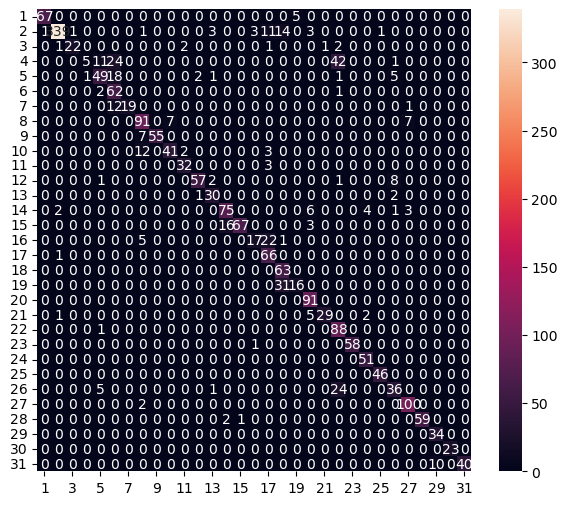

Classification Report
              precision    recall  f1-score   support

           1       0.99      0.93      0.96        72
           2       0.99      0.90      0.94       377
           3       0.96      0.76      0.85        29
           4       0.83      0.06      0.11        83
           5       0.71      0.64      0.67        77
           6       0.53      0.95      0.69        65
           7       1.00      0.59      0.75        32
           8       0.77      0.87      0.82       105
           9       1.00      0.89      0.94        62
          10       0.85      0.71      0.77        58
          11       0.89      0.91      0.90        35
          12       0.95      0.83      0.88        69
          13       0.81      0.91      0.86        33
          14       0.81      0.82      0.82        91
          15       0.99      0.78      0.87        86
          16       0.81      0.38      0.52        45
          17       0.62      0.99      0.76        67
     

In [288]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [289]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [290]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpxg5aweyj\assets


INFO:tensorflow:Assets written to: C:\Users\hanas\AppData\Local\Temp\tmpxg5aweyj\assets


Saved artifact at 'C:\Users\hanas\AppData\Local\Temp\tmpxg5aweyj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_15')
Output Type:
  TensorSpec(shape=(None, 32), dtype=tf.float32, name=None)
Captures:
  2549391939472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549391948880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549391942544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549391937552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549391944464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2549391948496: TensorSpec(shape=(), dtype=tf.resource, name=None)


7844

# Inference test

In [291]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

C:\Users\hanas\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [292]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [293]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [294]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 307 μs


In [295]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.23568631e-18 4.88185963e-21 4.98627359e-03 1.53683271e-04
 1.52506912e-03 5.79697918e-03 2.18435639e-06 1.11837174e-07
 6.03263845e-14 1.74966016e-15 4.96553614e-20 8.16222041e-18
 3.10047586e-02 5.32209612e-02 1.08642958e-01 2.24044994e-02
 1.88435937e-13 4.11317346e-17 1.43144366e-17 6.27310657e-18
 2.04110593e-02 2.92814965e-03 7.03621423e-03 6.27936679e-04
 6.69807792e-01 1.84310975e-05 2.63736770e-02 4.73472095e-10
 4.50336523e-02 2.53243030e-07 2.52162154e-05 8.10448384e-08]
24
